In [3]:
import fastaudio as fa
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastai.torch_basics import *
from fastai.basics import *
from fastai.data.all import *
from fastai.callback.all import *
from fastai.vision.all import *
from hmmlearn import hmm

In [4]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

In [ ]:
model.algorithm

In [2]:
bs = 64 # batch size
img_size = 24 # image size

In [40]:
path = Path('data_subsample')

In [41]:
fns = get_image_files(path)

In [54]:
fonts = DataBlock(blocks = (ImageBlock, CategoryBlock), 
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.3, seed=42),
    get_y = parent_label,
    item_tfms = Resize(64))    

In [55]:
dls = fonts.dataloaders(path, num_workers=0)

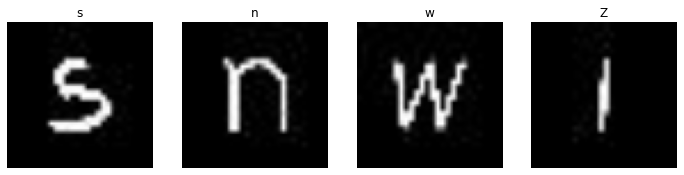

In [56]:
dls.valid.show_batch(max_n=4, nrows=1)

In [57]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.584772,1.333003,0.380414,08:26


epoch,train_loss,valid_loss,error_rate,time
0,0.861395,0.729803,0.210173,09:57
1,0.644703,0.555512,0.160339,16:26
2,0.395751,0.406104,0.114367,08:25
3,0.233299,0.368765,0.101158,08:36


<Figure size 720x1080 with 0 Axes>

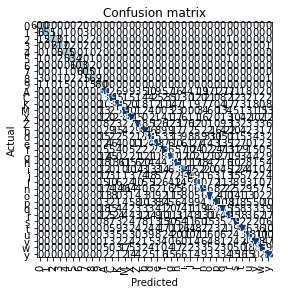

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
plt.figure(figsize=(10,15))
interp.plot_confusion_matrix()

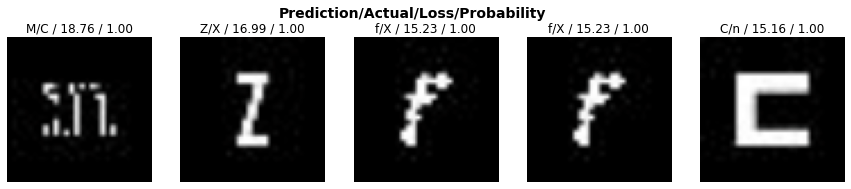

In [61]:
interp.plot_top_losses(5, nrows=1)

In [62]:
learn.export()

In [63]:
path = Path()
path.ls(file_exts = ".pkl")

(#1) [Path('export.pkl')]

In [65]:
learn.predict("j.jpg")

('j',
 tensor(23),
 tensor([9.7120e-05, 1.6175e-05, 1.2143e-05, 8.5250e-06, 1.4297e-05, 5.5905e-05,
         3.1772e-05, 3.9903e-06, 1.6234e-04, 6.1815e-06, 1.0761e-03, 1.1692e-05,
         1.0183e-03, 1.1239e-05, 1.9529e-03, 2.4680e-04, 1.6227e-03, 3.3790e-03,
         2.0438e-05, 2.9992e-03, 8.5613e-04, 2.1967e-03, 1.9095e-02, 9.5126e-01,
         4.8596e-04, 5.4532e-05, 5.3738e-05, 6.6400e-05, 3.2276e-05, 2.5700e-04,
         5.3762e-03, 4.5219e-04, 1.6724e-03, 2.3906e-04, 7.0379e-05, 5.0808e-03]))

In [3]:
learn.predict()

NameError: name 'learn' is not defined

In [5]:
from scipy.io import wavfile
import fastaudio

import os   

In [7]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en\clips"
fpaths = []
labels=[]
spoken =[]